## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

## Read the dataset

In [4]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [32]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Exploratory data analysis

#### check if the dataset is balanced

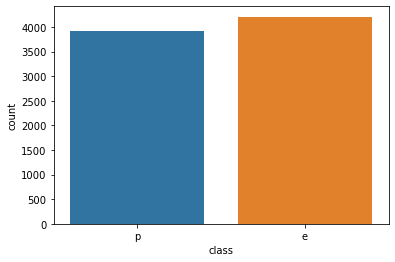

In [6]:
# p is poisonous and e is edible

X = data['class']

ax = sns.countplot(x = X , data = data)

####  To see how each feature affects the target. To do so, for each feature, make a bar plot of all possible values separated by the class of mushroom. Doing it manually for all 22 features makes no sense, so we build this helper function

In [7]:
def plot_data(hue,data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc = {'figure.figsize':(11.7,8.27)})
        ax = sns.countplot(x =data[col],hue = hue , data = data)

/home/sudhir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


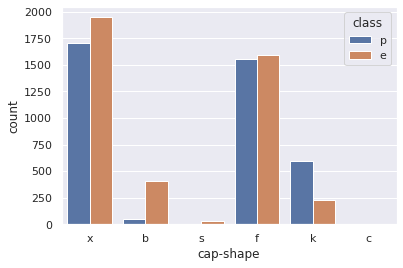

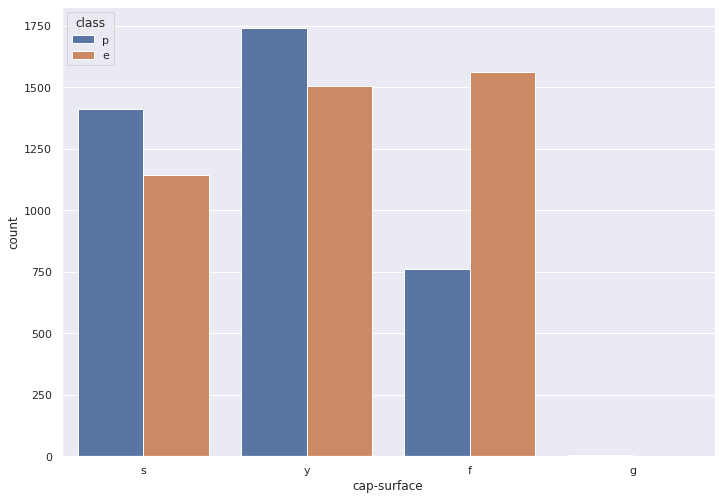

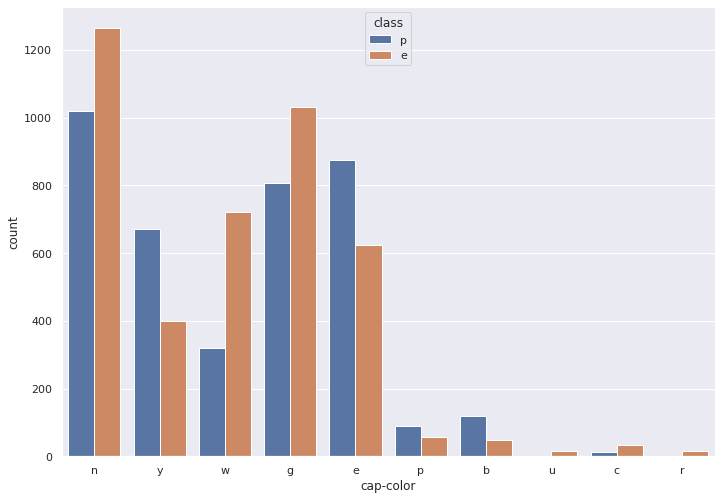

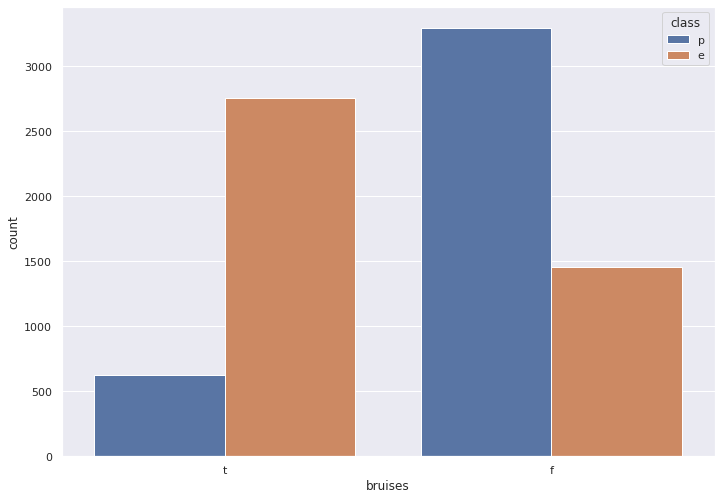

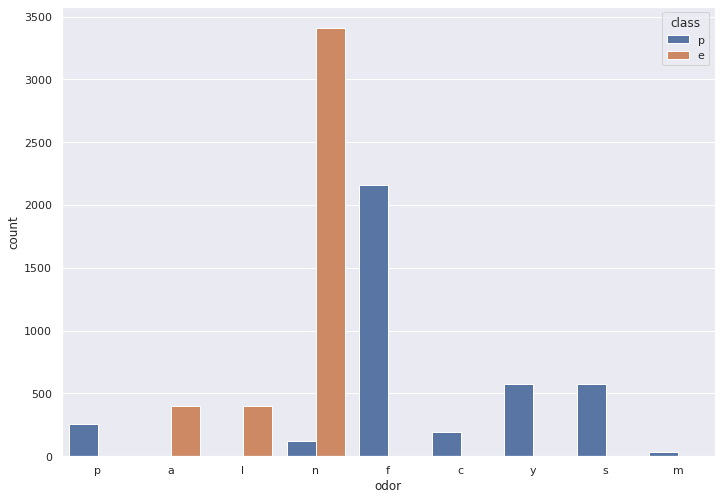

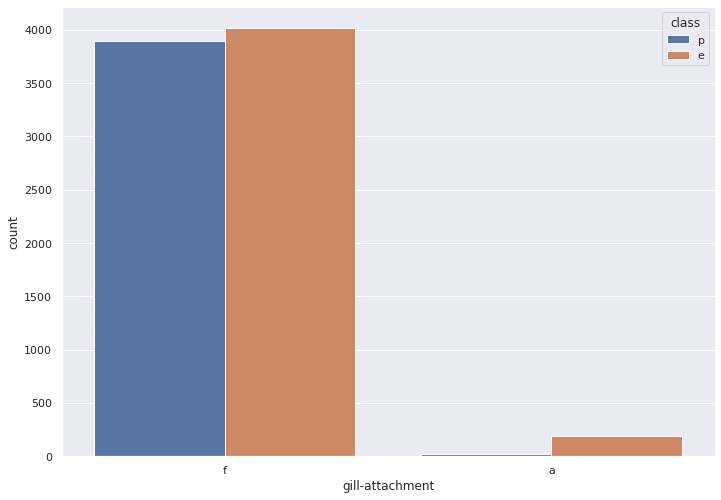

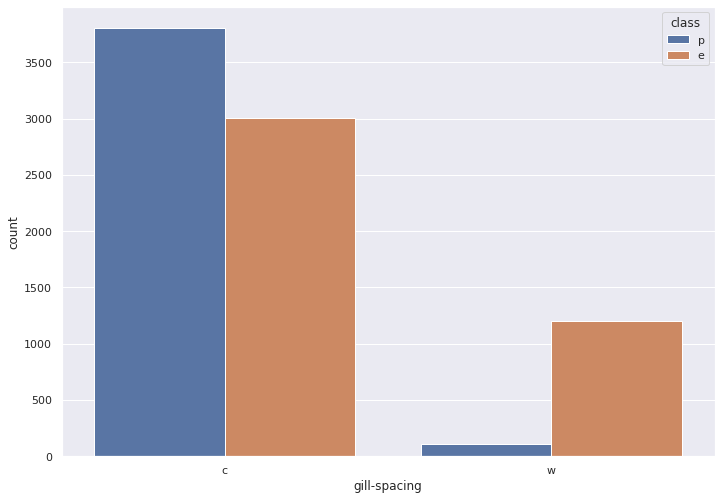

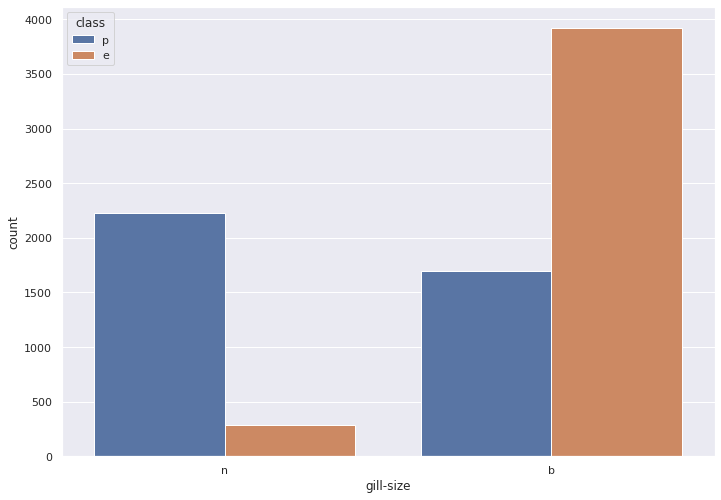

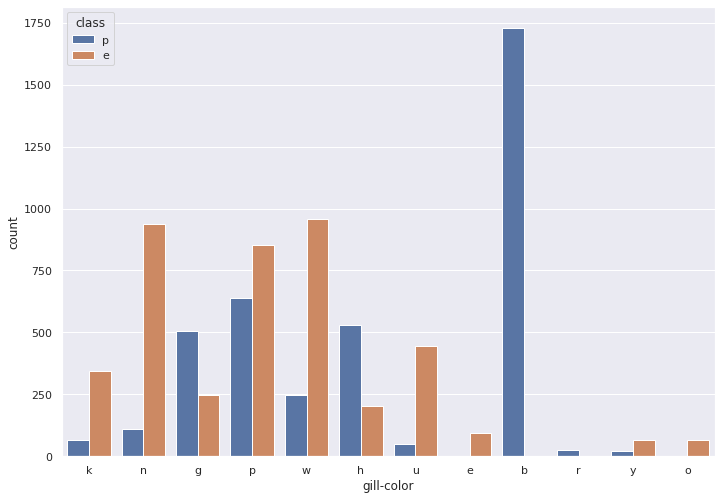

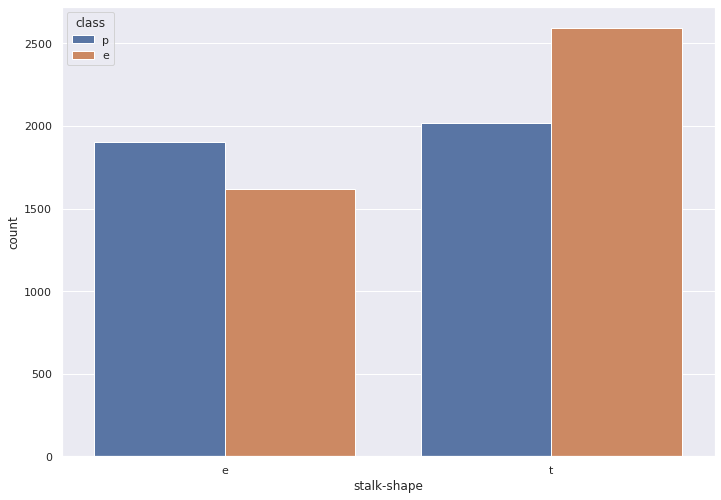

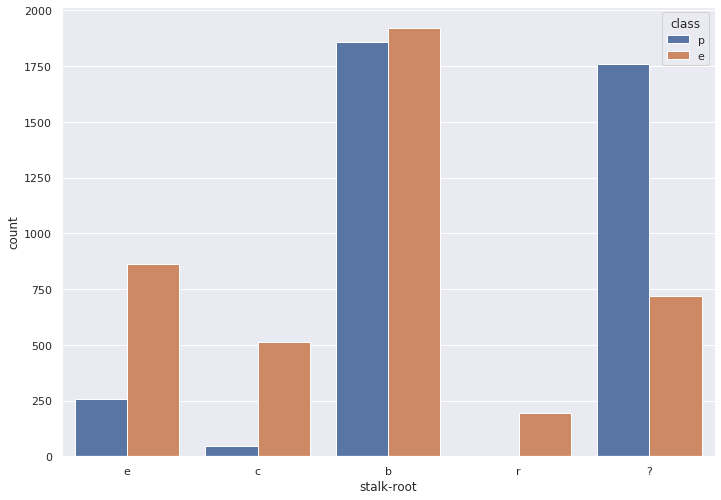

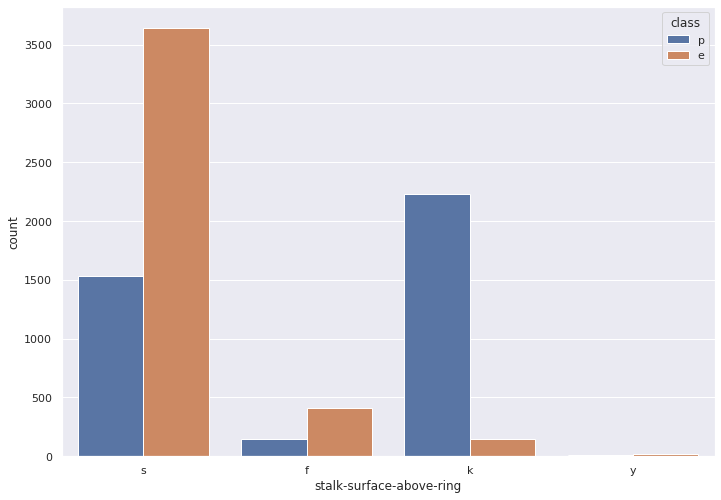

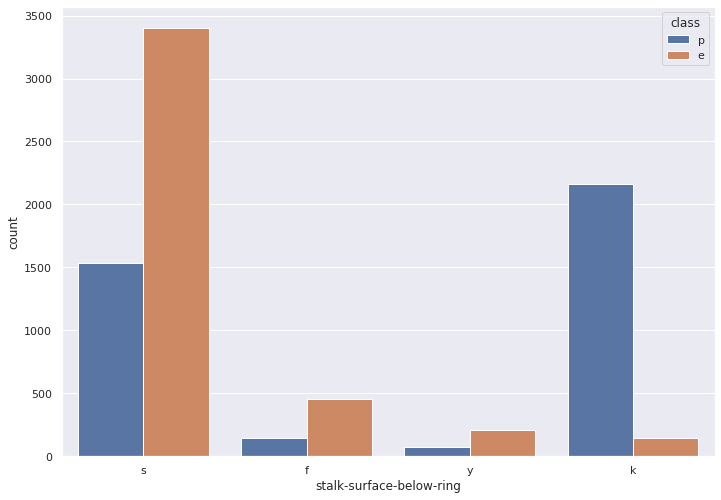

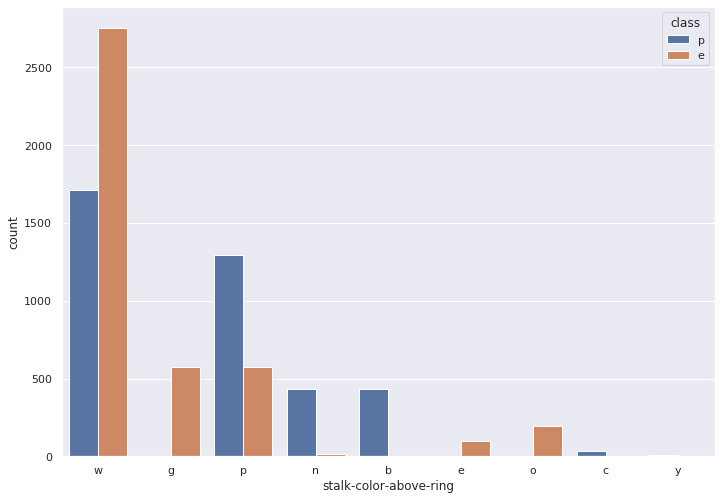

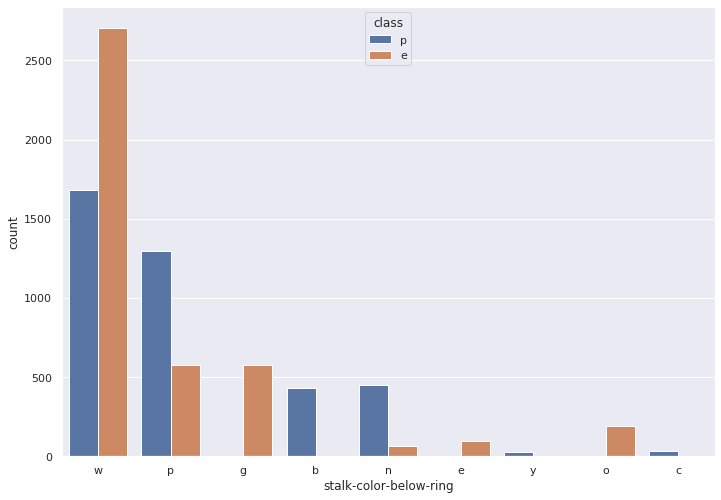

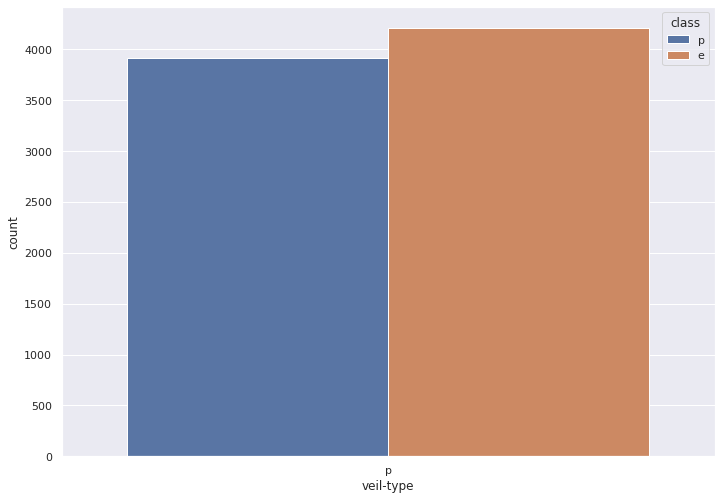

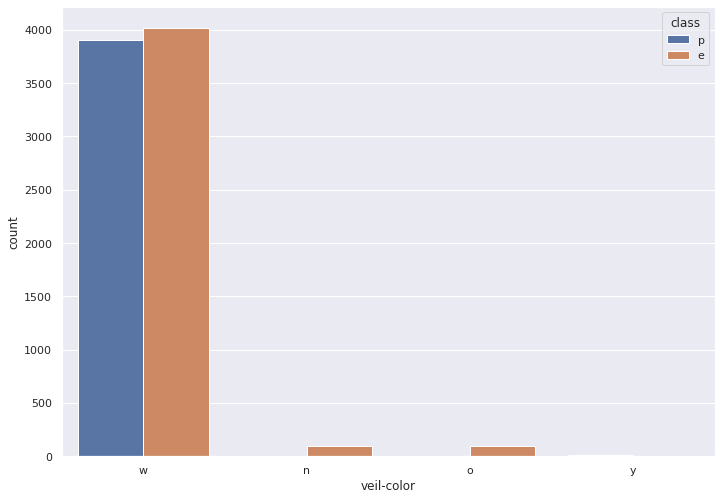

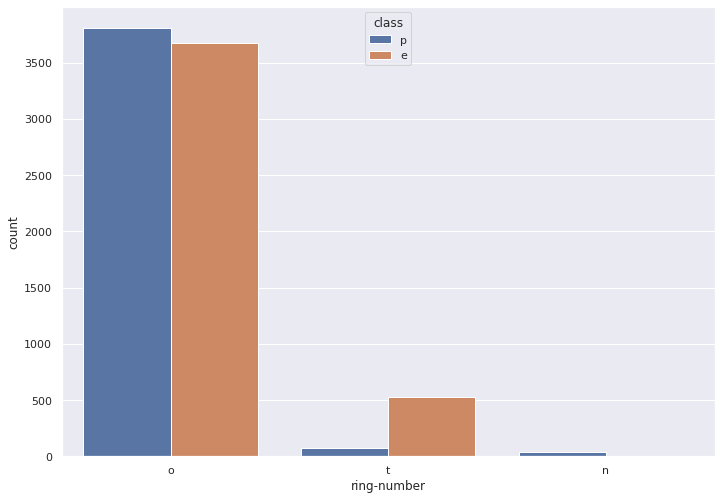

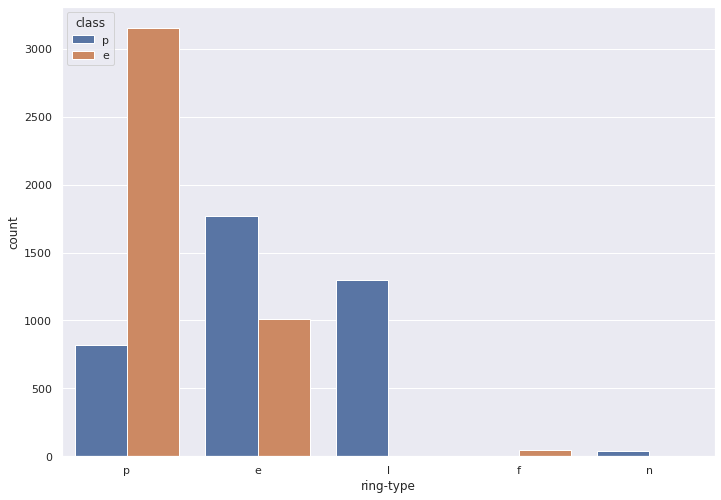

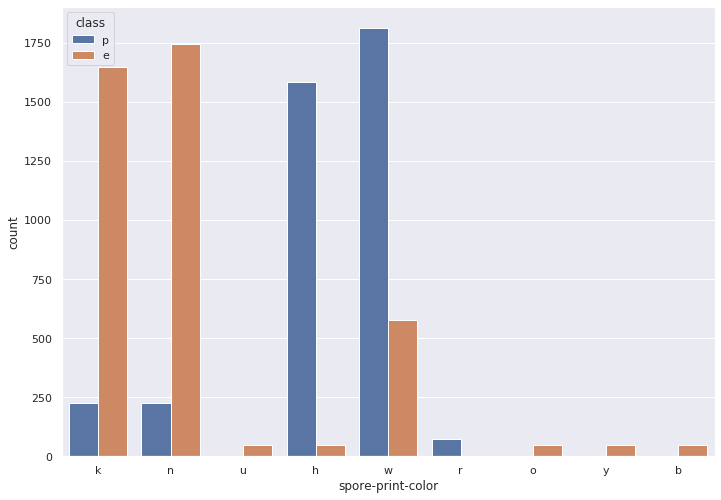

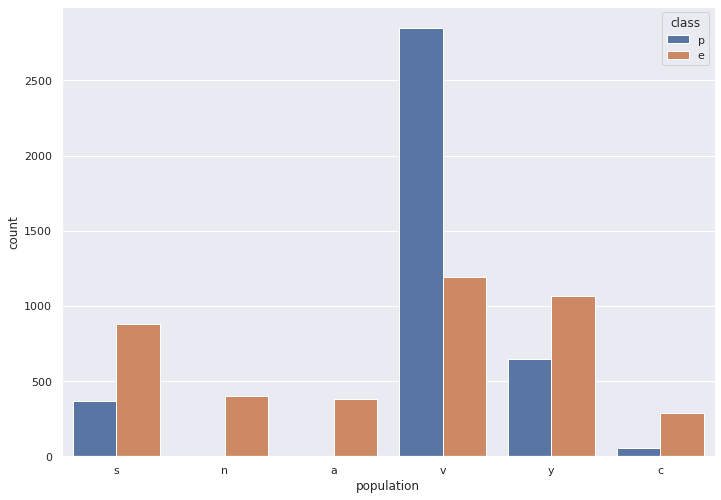

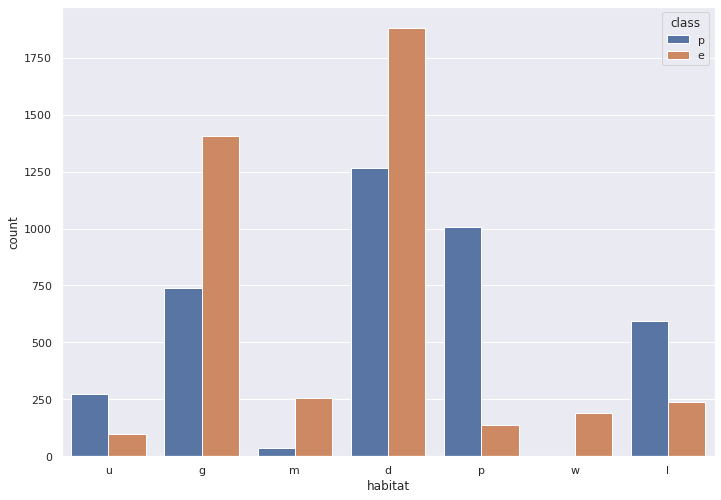

In [8]:
#The hue will give a color code to the poisonous and edible class.
#The data parameter will contain all features but the mushroom’s 
#class



hue = data['class']
data_for_plot = data.drop('class' , 1)

plot_data(hue,data_for_plot)

#### Now, let’s see if we have any missing values. Run this piece of code:

In [9]:
#Now, let’s see if we have any missing values. 
#Run this piece of code:

for col in data.columns:
    print("{} : {}".format(col , data[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


### Getting ready for modelling

In [10]:
# the features have letters to represent the different possible values, but we need to turn them into numbers.

#To achieve that, we will use label encoding and one-hot encoding.

#Let’s first use label encoding on the target column

le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head()

#Now, poisonous is represented by 1 and edible is represented by 0.
#Now, we can think of our classifier as “poisonous or not”. 
#A poisonous mushroom gets a 1 (true), and an edible mushroom
#gets a 0 (false).

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
#Hence, label encoding will turn a categorical feature into numerical. However, it is not recommended to use label encoding when there are more than two possible values.

#Why?


#Because it will then assign each value to either 0, 1 or 2. This is a problem, because the “2” could be considered as being more important and false correlations could be drawn from that.

#To avoid this problem, we use one-hot encoding on the other 
#features. To understand what it does, let’s consider the cap 
#shape of the first entry point. You see it has a value of “x”,
#which stands for a convex cap shape. However, there is a total
#of six different cap shapes recorded in the data set.


encoded_data = pd.get_dummies(data)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Modelling

In [12]:
from sklearn.model_selection import train_test_split

y = data['class'].values.reshape(-1,1)
X = encoded_data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)


## Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [14]:
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_prob = logistic_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5 ,1, 0)

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[843,   0],
       [  0, 782]])

In [17]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)

auc_roc

1.0

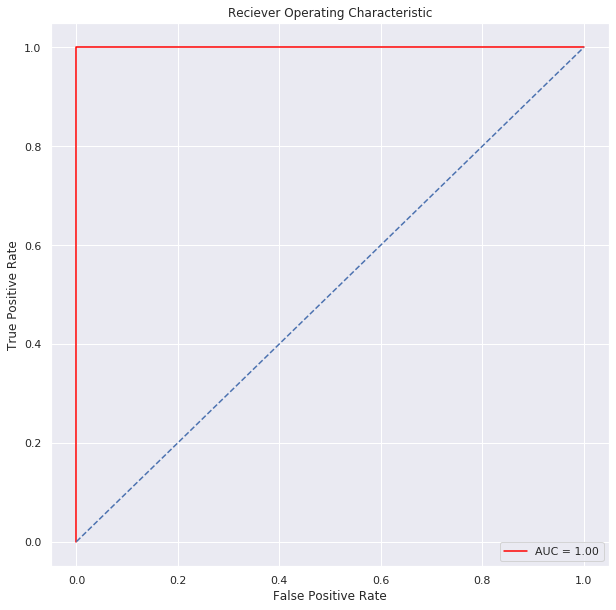

In [19]:
from sklearn.metrics import roc_curve , auc

false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)

def plot_roc(roc_auc):
    plt.figure(figsize = (10,10))
    plt.title('Reciever Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate , color = 'red', label= 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
plot_roc(roc_auc)    
    

## Classifier with LDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Make an instance of the model
lda = LinearDiscriminantAnalysis()

#fit the model to the training set
lda.fit(X_train,y_train.ravel())





LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [23]:
#make predictions
y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob > 0.5,1,0)


In [22]:
#print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_lda)
confusion_matrix


array([[843,   0],
       [  0, 782]])

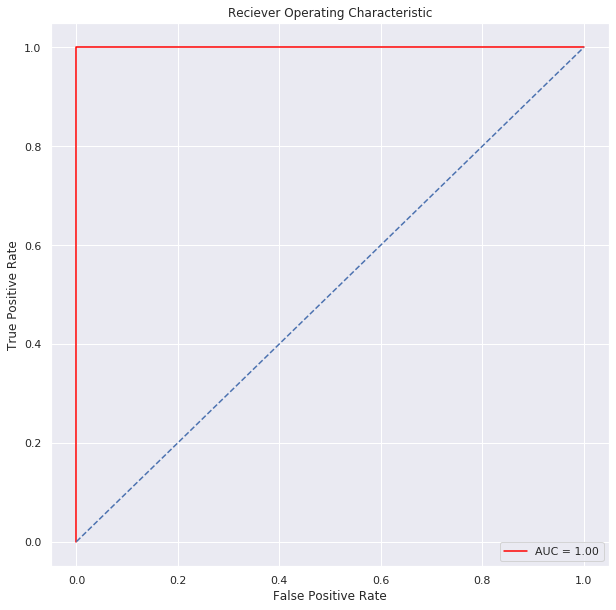

In [25]:
#plot the ROC curve and get the area under the curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate , true_positive_rate)
roc_auc_lda

plot_roc(roc_auc_lda)

## Classifier with QDA

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#make the instance of the model
qda = QuadraticDiscriminantAnalysis()

#fit the model to the training set
qda.fit(X_train , y_train.ravel())

/home/sudhir/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [27]:
#make predictions
y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob > 0.5,1,0)


In [29]:
#print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_qda)
confusion_matrix

array([[843,   0],
       [  0, 782]])

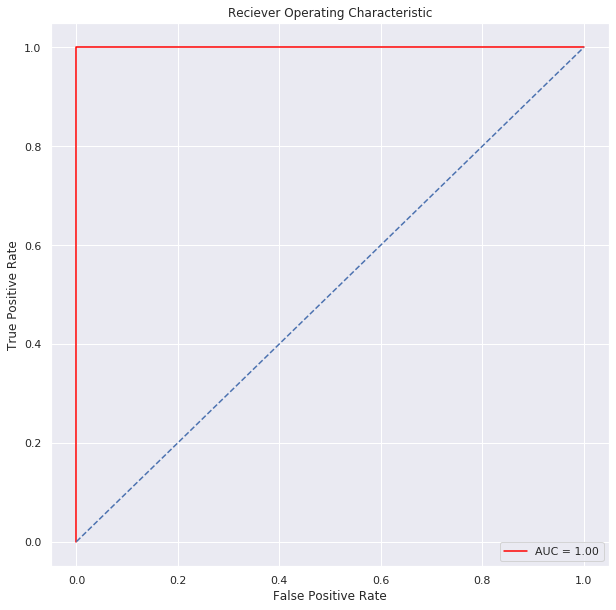

In [31]:
#plot the ROC curve and get the area under the curve
false_positive_rate , true_positive_rate, thresholds = roc_curve(y_test , y_prob_qda)
roc_auc_qda = auc(false_positive_rate , true_positive_rate)
roc_auc_qda

plot_roc(roc_auc_qda)